# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from citipy import citipy
import numpy as np
import time
from api_keys import api_key

## Generate Cities List

In [5]:
latitudes = np.random.uniform(-90, 90, 1300)
longitudes = np.random.uniform(-180, 180, 1300)

coordinates = zip(latitudes, longitudes)

city_names = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in city_names:
        city_names.append(city)
        
len(city_names)

536

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

city_info = []
lat = []
lon = []
mx_tmp = []
humid = []
cloud = []
wind = []
country = []
date = []

print("Beginning Data Retrieval     ")
print("-----------------------------------")

count = 1
set_1 = 1


for city in city_names:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        mx_tmp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if count > 50:
            set_1 += 1
            city_info.append(city)
        else:
            count += 1
            city_info.append(city)
        print(f"Processing Record {count} of Set {set_1} | {city}")
    except Exception:
        print("City not found. Skipping...")
    
print("-----------------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------------")                
        

Beginning Data Retrieval     
-----------------------------------
Processing Record 2 of Set 1 | seoul
Processing Record 3 of Set 1 | nyazepetrovsk
City not found. Skipping...
Processing Record 4 of Set 1 | tsogni
Processing Record 5 of Set 1 | esmeraldas
Processing Record 6 of Set 1 | taoudenni
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | chara
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | kumluca
Processing Record 12 of Set 1 | kemijarvi
Processing Record 13 of Set 1 | victor harbor
Processing Record 14 of Set 1 | nazare da mata
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | kikwit
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | siderno
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | butaritari
City not found. Skipping...
Process

Processing Record 51 of Set 137 | lethem
Processing Record 51 of Set 138 | joensuu
Processing Record 51 of Set 139 | ziro
Processing Record 51 of Set 140 | benghazi
City not found. Skipping...
Processing Record 51 of Set 141 | mackay
Processing Record 51 of Set 142 | cabo san lucas
Processing Record 51 of Set 143 | rock sound
Processing Record 51 of Set 144 | adilabad
Processing Record 51 of Set 145 | pella
Processing Record 51 of Set 146 | dwarka
Processing Record 51 of Set 147 | faya
Processing Record 51 of Set 148 | wuda
Processing Record 51 of Set 149 | mandalgovi
Processing Record 51 of Set 150 | hirara
Processing Record 51 of Set 151 | luderitz
Processing Record 51 of Set 152 | thunder bay
Processing Record 51 of Set 153 | socorro
Processing Record 51 of Set 154 | poum
Processing Record 51 of Set 155 | berlevag
Processing Record 51 of Set 156 | flin flon
Processing Record 51 of Set 157 | bosaso
Processing Record 51 of Set 158 | tchollire
Processing Record 51 of Set 159 | valparai

Processing Record 51 of Set 318 | tabas
Processing Record 51 of Set 319 | mokhsogollokh
Processing Record 51 of Set 320 | quatre cocos
Processing Record 51 of Set 321 | batemans bay
Processing Record 51 of Set 322 | brae
Processing Record 51 of Set 323 | jinchang
Processing Record 51 of Set 324 | lazaro cardenas
Processing Record 51 of Set 325 | juneau
Processing Record 51 of Set 326 | nemuro
Processing Record 51 of Set 327 | bambanglipuro
Processing Record 51 of Set 328 | saint-ambroise
Processing Record 51 of Set 329 | el alto
Processing Record 51 of Set 330 | borogontsy
Processing Record 51 of Set 331 | rochester
Processing Record 51 of Set 332 | kiunga
City not found. Skipping...
Processing Record 51 of Set 333 | narragansett
Processing Record 51 of Set 334 | salalah
Processing Record 51 of Set 335 | borodino
Processing Record 51 of Set 336 | aligudarz
Processing Record 51 of Set 337 | constantine
Processing Record 51 of Set 338 | tiznit
Processing Record 51 of Set 339 | ailigandi


In [8]:
len(city_info)

538

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {
    "City": city_info,
    "Lat": lat,
    "Lng": lon,
    "Max_Temp": mx_tmp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind_Speed": wind,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

csv_file = "WeatherPy_data.csv"
weather_data.to_csv(csv_file)

weather_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,seoul,37.5683,126.9778,81.84,57,29,1.45,KR,1627135960
1,nyazepetrovsk,56.0531,59.6028,66.74,65,99,2.30,RU,1627136044
2,tsogni,-2.7942,10.0988,76.77,64,24,10.42,GA,1627136045
3,esmeraldas,-19.7625,-44.3139,68.86,41,0,8.46,BR,1627136045
4,taoudenni,22.6783,-3.9836,113.14,6,7,10.29,ML,1627136045


In [12]:
weather_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02
mean,19.624004,15.506798,71.492900,66.583643,54.624535,7.986784,1.627136e+09
std,33.047292,91.813965,14.807776,22.494723,40.081531,5.632277,7.752476e+01
min,-54.800000,-175.200000,35.130000,6.000000,0.000000,0.000000,1.627136e+09
25%,-6.828375,-68.530925,61.372500,53.000000,9.250000,3.605000,1.627136e+09
50%,24.677200,21.396350,74.110000,70.000000,65.000000,6.910000,1.627136e+09
75%,46.330850,98.218475,81.875000,84.000000,95.000000,11.010000,1.627136e+09
max,78.218600,179.316700,113.140000,100.000000,100.000000,31.070000,1.627136e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_100 = weather_data.loc[weather_data["Humidity"] > 100]
humidity_100

NameError: name 'weather_data' is not defined

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [34]:
# Had to import CSV file saved above because kernel restarted and I did not want to generate new cities again.
city_csv_path = "Output/WeatherPy_data.csv"
weather_data_df = pd.read_csv(city_csv_path)

weather_data = weather_data_df.drop(["Unnamed: 0"], axis = 1)
weather_data

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,seoul,37.5683,126.9778,81.84,57,29,1.45,KR,1627135960
1,nyazepetrovsk,56.0531,59.6028,66.74,65,99,2.30,RU,1627136044
2,tsogni,-2.7942,10.0988,76.77,64,24,10.42,GA,1627136045
3,esmeraldas,-19.7625,-44.3139,68.86,41,0,8.46,BR,1627136045
4,taoudenni,22.6783,-3.9836,113.14,6,7,10.29,ML,1627136045
...,...,...,...,...,...,...,...,...,...
533,bella union,-30.2752,-57.6007,70.52,58,69,11.74,UY,1627136198
534,bumba,2.1833,22.4667,86.00,49,98,3.78,CD,1627136166
535,necochea,-38.5473,-58.7368,51.04,57,98,15.10,AR,1627136199
536,uinskoye,56.8817,56.5813,62.92,82,79,5.12,RU,1627136199


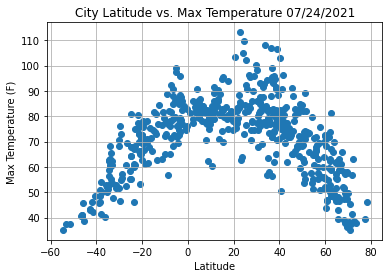

In [38]:
date = time.strftime("%m/%d/%Y")
plt.scatter(weather_data["Lat"], weather_data["Max_Temp"])
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel(f"Latitude")
plt.ylabel(f"Max Temperature (F)")
plt.grid(True)

plt.savefig("Output/lat_vs_temp.png", dpi = 300)

plt.show()

## Latitude vs. Humidity Plot

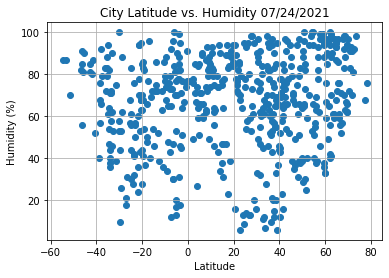

In [39]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel(f"Latitude")
plt.ylabel(f"Humidity (%)")
plt.grid(True)

plt.savefig("Output/lat_vs_humid.png", dpi = 300)

plt.show()

## Latitude vs. Cloudiness Plot

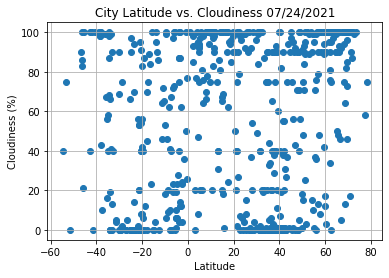

In [40]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel(f"Latitude")
plt.ylabel(f"Cloudiness (%)")
plt.grid(True)

plt.savefig("Output/lat_vs_cloud.png", dpi = 300)

plt.show()

## Latitude vs. Wind Speed Plot

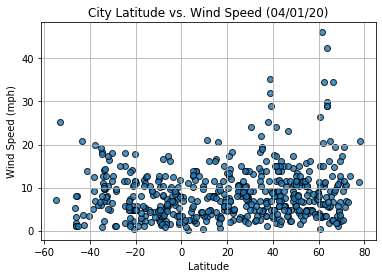

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


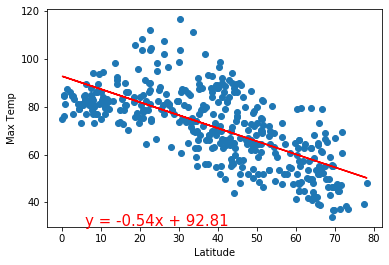

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


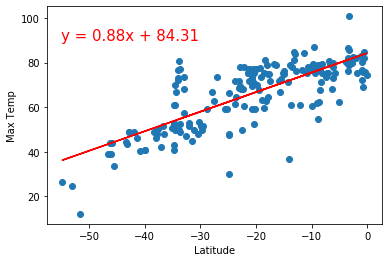

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


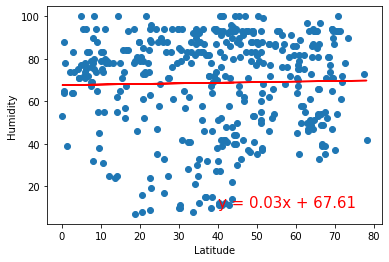

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


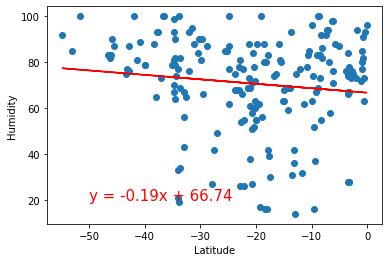

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


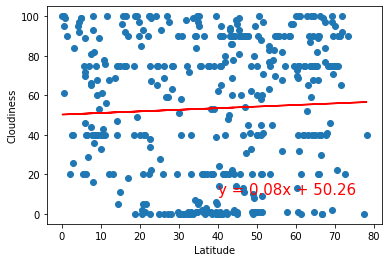

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


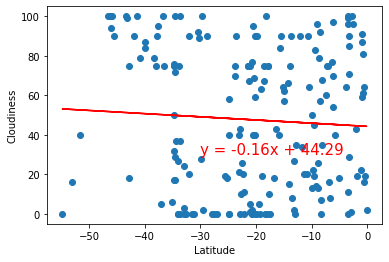

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


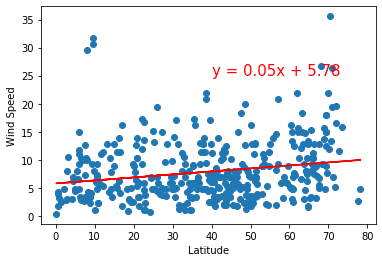

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


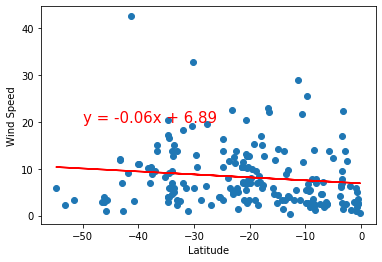